In [ ]:
# import the used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
from tensorflow import keras

In [ ]:
# the path of training and test data
trainpath='/content/drive/MyDrive/Brain_Data_Organised/Train'
testpath='/content/drive/MyDrive/Brain_Data_Organised/Test'

In [ ]:
# Set the image size and batch size for the datasets.
image_size =(224, 224)
batch_size=1
# Load the training dataset from the directory "Brain_Data_Organised/Train".
# Split the dataset into training and validation subsets using a validation split of 0.20.
# Use a seed value of 1337 for reproducibility.
# Set the image size and batch size.
train_df = tf.keras.preprocessing.image_dataset_from_directory(
      "/content/drive/MyDrive/Brain_Data_Organised/Train",
      validation_split=0.20,
      subset='training',
      seed=1337,
      image_size=image_size,
      batch_size=batch_size,
)
# Load the validation dataset from the directory "Brain_Data_Organised/Train".
# Split the dataset into training and validation subsets using a validation split of 0.20.
# Use a seed value of 333 for reproducibility.
# Set the image size and batch size.
val_df = tf.keras.preprocessing.image_dataset_from_directory(
      "/content/drive/MyDrive/Brain_Data_Organised/Train",
      validation_split=0.20,
      subset='validation',
      seed=333,
      image_size=image_size,
      batch_size=batch_size,
)
# Load the test dataset from the directory "Brain_Data_Organised/Test".
# Do not shuffle the test dataset.
# Set the image size and batch size.
test_df = tf.keras.preprocessing.image_dataset_from_directory(
     "/content/drive/MyDrive/Brain_Data_Organised/Test",
      image_size=image_size,
      batch_size=batch_size,
      shuffle=False,
)

Found 2251 files belonging to 2 classes.
Using 1801 files for training.
Found 2251 files belonging to 2 classes.
Using 450 files for validation.
Found 250 files belonging to 2 classes.


In [ ]:
#This line  is creating a NumPy array of the true labels for the test dataset by concatenating the labels from each batch of the test_df dataset.
y_true = np.concatenate([y for x,y in test_df ], axis = 0)

In [ ]:
code= {'Normal':0 , 'Stroke':1 }

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [ ]:
# Here we build the convolutional neural network......
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.2) ,            
        keras.layers.Dense(1,activation='sigmoid') ,    
        ])

In [ ]:
#This line of code is used to compile a Keras model in Python, and sets up the optimizer, loss function, and evaluation metrics for the model.
KerasModel.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

#This code snippet is used to print out the details of a Keras model in Python, including the architecture of the model and the number of parameters in each layer.
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 200)     5600      
                                                                 
 conv2d_31 (Conv2D)          (None, 220, 220, 150)     270150    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 55, 55, 150)      0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 53, 53, 120)       162120    
                                                                 
 conv2d_33 (Conv2D)          (None, 51, 51, 80)        86480     
                                                                 
 conv2d_34 (Conv2D)          (None, 49, 49, 50)        36050     
                                 

In [ ]:
#This code snippet is used to train a Keras model in Python using the fit() method, which trains the model on a training dataset (train_df) and evaluates its performance on a validation dataset (val_df) for a specified number of epochs (30 in this case).
epochs = 30
ThisModel = KerasModel.fit(train_df, epochs=epochs, validation_data=val_df,verbose=1)


Epoch 1/30
1801/1801 [==============================] - 43s 22ms/step - loss: 1.0175 - accuracy: 0.6363 - val_loss: 0.6382 - val_accuracy: 0.6244
Epoch 2/30
1801/1801 [==============================] - 39s 22ms/step - loss: 0.6509 - accuracy: 0.6685 - val_loss: 0.7895 - val_accuracy: 0.6489
Epoch 3/30
1801/1801 [==============================] - 39s 22ms/step - loss: 0.6017 - accuracy: 0.6785 - val_loss: 0.5017 - val_accuracy: 0.7244
Epoch 4/30
1801/1801 [==============================] - 39s 22ms/step - loss: 0.4982 - accuracy: 0.7540 - val_loss: 0.2958 - val_accuracy: 0.8756
Epoch 5/30
1801/1801 [==============================] - 41s 23ms/step - loss: 0.3710 - accuracy: 0.8362 - val_loss: 0.2678 - val_accuracy: 0.9067
Epoch 6/30
1801/1801 [==============================] - 41s 23ms/step - loss: 0.2760 - accuracy: 0.8873 - val_loss: 0.2369 - val_accuracy: 0.9067
Epoch 7/30
1801/1801 [==============================] - 41s 23ms/step - loss: 0.2110 - accuracy: 0.9206 - val_loss: 0.1891 -

In [ ]:
KerasModel.save("cnn_model.h5")

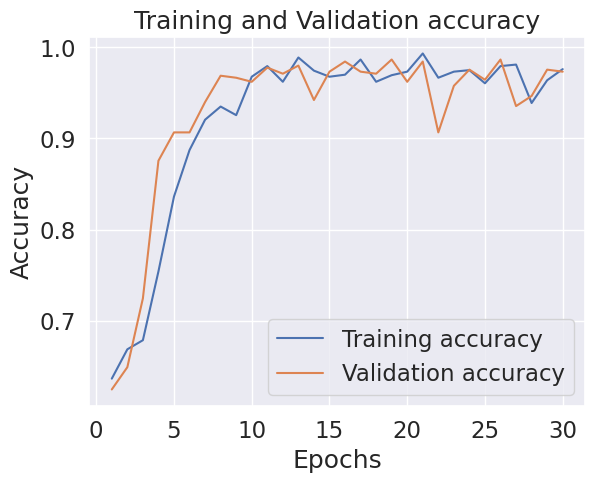

<Figure size 640x480 with 0 Axes>

In [ ]:
#This code plots the training and validation accuracy as well as the training and validation loss over the epochs
#This visualization helps to identify if the model is overfitting or underfitting by comparing the training and validation metrics.
# If the training accuracy is much higher than the validation accuracy, the model is likely overfitting, and if the validation loss is much higher than the training loss, the model is likely underfitting
acc = ThisModel.history['accuracy']
val_acc = ThisModel.history['val_accuracy']
loss = ThisModel.history['loss']
val_loss = ThisModel.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()
 

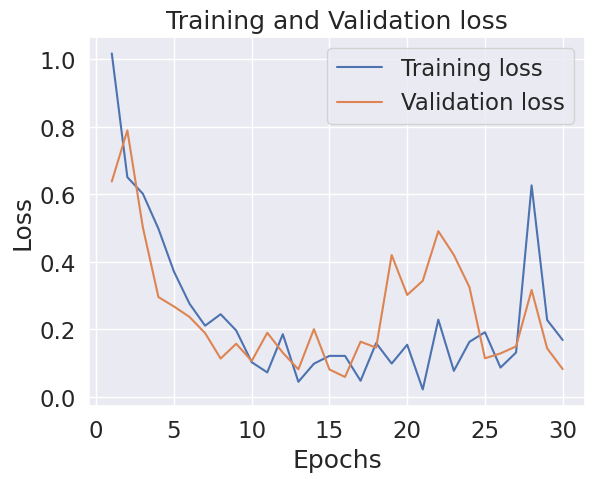

In [ ]:
#Train and validation loss
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
results = KerasModel.evaluate(test_df, verbose=1)

250/250 [==============================] - 2s 7ms/step - loss: 1.6060 - accuracy: 0.7440


In [ ]:
#This code generates predictions on the test data "test_df" using the loaded model with the predict() method. The predictions are rounded to 0 or 1 using the round() method and flattened into a 1D array
y_pred = KerasModel.predict(test_df, verbose=1).round()
y_pred = y_pred.flatten()
#classification_report() method from sklearn is used to generate a report on the model's classification performance.
#The report includes metrics such as precision, recall, F1-score, and support for each class. The target_names parameter is used to specify the class labels for the report, and the digits parameter is used to set the number of digits to display for each metric.
#This report can help to evaluate the model's classification performance and identify areas for improvement.
from sklearn.metrics import classification_report
target_names = ['class non stroke', 'class stroke']
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

250/250 [==============================] - 2s 6ms/step
                  precision    recall  f1-score   support

class non stroke     0.6704    0.9600    0.7895       125
    class stroke     0.9296    0.5280    0.6735       125

        accuracy                         0.7440       250
       macro avg     0.8000    0.7440    0.7315       250
    weighted avg     0.8000    0.7440    0.7315       250



              precision    recall  f1-score   support

      Stroke     0.6704    0.9600    0.7895       125
  Non stroke     0.9296    0.5280    0.6735       125

    accuracy                         0.7440       250
   macro avg     0.8000    0.7440    0.7315       250
weighted avg     0.8000    0.7440    0.7315       250



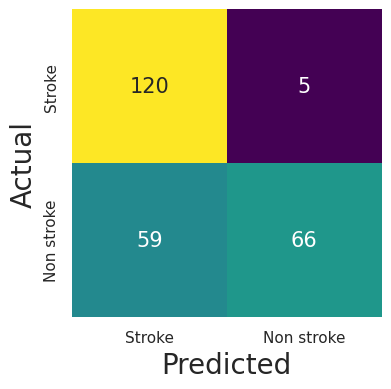

In [ ]:
#This code generates a confusion matrix using the true labels "y_true" and the predicted labels "y_pred". 
#The confusion matrix is displayed as a heatmap using the seaborn library's heatmap function. The heatmap is annotated with the count of true positives, false positives, true negatives, and false negatives in each cell.
#the fmt parameter is used to format the cell values as integers. The seaborn heatmap function also allows customization of the heatmap's colors and font size
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd

target_names = ['Stroke', 'Non stroke']
report = classification_report(y_true, y_pred, target_names=target_names, digits=4)
print(report)

disp = confusion_matrix(y_true, y_pred)
disp = disp.astype('int')
pd.options.display.float_format = '{:.5f}'.format
df_cm = pd.DataFrame(disp, target_names, target_names)

fig, ax = plt.subplots(figsize=(4, 4))
sns.set(font_scale=1.5) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 15}, ax=ax, cmap="viridis", fmt='g', cbar=False) # font
plt.ylabel('Actual',fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.ioff()
plt.savefig("confusion_mat", bbox_inches='tight')
plt.show()


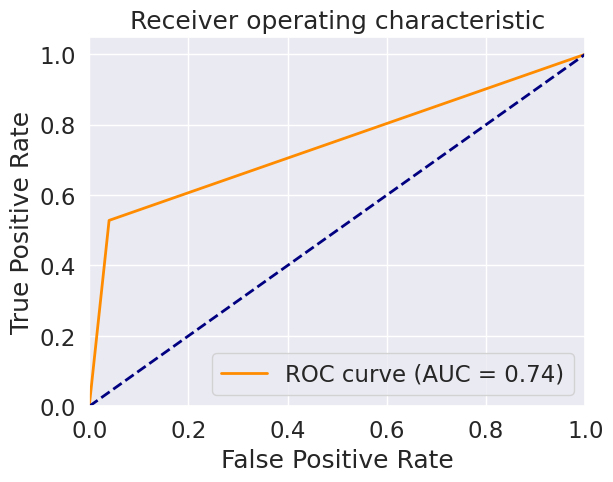

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_true and y_score are the true labels and predicted probabilities, respectively
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model = keras.models.load_model('cnn_model.h5')